# Java Restaurant AI Chatbot Project – Problem Statement

Modern restaurants receive a large volume of customer inquiries every day—ranging from menu questions, dietary information, promotions, pricing, orders, reservations, and general service details. Responding to these questions manually is time-consuming and inconsistent, especially during peak hours.

To improve customer experience and streamline operations, this project aims to **build an AI-powered restaurant chatbot** that can:

- Answer frequently asked questions (FAQs) using a **structured knowledge base**  
- Provide menu details such as pricing, preparation time, categories, and dietary tags  
- Support inquiries about promotions, reservations, and customer orders  
- Deliver accurate, fast, and context-aware responses  
- Integrate with automation tools like **n8n** for workflow execution (e.g., sending reservation confirmations, logging interactions)
To achieve this, we perform **Exploratory Data Analysis (EDA)** on the restaurant datasets:

- `menu_df` – Menu items and attributes  
- `faqs_df` – Frequently asked questions  
- `orders_df` – Customer orders  
- `reservations_df` – Reservation information  
- `promotions_df` – Active promotions  

Insights from EDA help structure and enrich the **knowledge base**, ensuring the chatbot can answer real customer queries reliably and efficiently.

This notebook documents the data preparation, EDA, knowledge-base creation, and the foundations required for deploying the chatbot in a production environment.

### Step 1: Load the Restaurant Datasets

In this step, we load all relevant datasets from CSV files into Python using `pandas`. Each dataset corresponds to a different aspect of the restaurant:

1. **FAQs** – Customer questions and answers.
2. **Menu** – Food and drink items with descriptions and prices.
3. **Orders** – Historical customer orders.
4. **Promotions** – Current promotional offers.
5. **Reservations** – Booking details made by customers.
6. **Restaurant Info** – General information about the restaurant (location, contact, etc.).

Loading these datasets is essential because they form the foundation for cleaning, exploration, and building the chatbot. Once loaded, we can examine each dataset for structure, missing values, duplicates, and general statistics to prepare them for further analysis.


In [10]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Define file paths for each dataset
faqs_path = r"C:\Users\use\Downloads\java_restaurant_data\Java_House_Restaurant_Data.xlsx - FAQs.csv"
menu_path = r"C:\Users\use\Downloads\java_restaurant_data\Java_House_Restaurant_Data.xlsx - Menu.csv"
orders_path = r"C:\Users\use\Downloads\java_restaurant_data\Java_House_Restaurant_Data.xlsx - Orders (1).csv"
promotions_path = r"C:\Users\use\Downloads\java_restaurant_data\Java_House_Restaurant_Data.xlsx - Promotions.csv"
reservations_path = r"C:\Users\use\Downloads\java_restaurant_data\Java_House_Restaurant_Data.xlsx - Reservations.csv"
restaurant_info_path = r"C:\Users\use\Downloads\java_restaurant_data\Java_House_Restaurant_Data.xlsx - Restaurant Info.csv"

# Step 3: Load each CSV into a pandas DataFrame
faqs_df = pd.read_csv(faqs_path)
menu_df = pd.read_csv(menu_path)
orders_df = pd.read_csv(orders_path)
promotions_df = pd.read_csv(promotions_path)
reservations_df = pd.read_csv(reservations_path)
restaurant_info_df = pd.read_csv(restaurant_info_path)

# Step 4: Print success message and shape of each dataset
print(f"FAQs loaded successfully. Shape: {faqs_df.shape}")
print(f"Menu loaded successfully. Shape: {menu_df.shape}")
print(f"Orders loaded successfully. Shape: {orders_df.shape}")
print(f"Promotions loaded successfully. Shape: {promotions_df.shape}")
print(f"Reservations loaded successfully. Shape: {reservations_df.shape}")
print(f"Restaurant Info loaded successfully. Shape: {restaurant_info_df.shape}")


FAQs loaded successfully. Shape: (247, 2)
Menu loaded successfully. Shape: (142, 5)
Orders loaded successfully. Shape: (100, 6)
Promotions loaded successfully. Shape: (4, 4)
Reservations loaded successfully. Shape: (100, 6)
Restaurant Info loaded successfully. Shape: (6, 2)


***Output interpretation***

In this step, we loaded all the restaurant datasets into **pandas DataFrames**. Each dataset corresponds to a different aspect of the restaurant’s operations:

- **FAQs**: 247 rows and 2 columns – contains common questions and answers customers may ask.  
- **Menu**: 142 rows and 5 columns – includes all menu items along with details like price, category, and description.  
- **Orders**: 100 rows and 6 columns – captures customer orders, quantities, and order details.  
- **Promotions**: 4 rows and 4 columns – lists active promotions and discounts.  
- **Reservations**: 100 rows and 6 columns – includes reservation information such as date, time, and number of guests.  
- **Restaurant Info**: 6 rows and 2 columns – contains basic details about the restaurant like address and contact info.  

By loading these datasets successfully, we can now **proceed to data cleaning, exploration (EDA), and analysis** to prepare the data for chatbot implementation.

### Step 2: Data Cleaning 

Before analyzing our datasets, we perform essential cleaning steps to ensure accuracy and consistency:

1. **Checking for missing values**  
   - Missing entries can occur if some data was not recorded during manual collection or if simulations did not generate complete records.  
   - Identifying missing values helps us handle incomplete information appropriately and avoid errors during analysis.

2. **Removing duplicates**  
   - Duplicate rows can result from repeated data entry or merging multiple sources.  
   - Dropping duplicates ensures that our analysis reflects the true dataset without exaggerating trends or counts.

3. **Trimming spaces in text columns**  
   - Extra spaces at the beginning or end of strings can cause inconsistencies in searching, filtering, or merging.  
   - Stripping spaces standardizes the text fields and avoids subtle errors during processing.

These steps collectively improve data quality, making subsequent exploratory data analysis (EDA) and model building more reliable.


In [11]:
# Combined cleaning: missing values, duplicates, strip spaces
datasets = {
    "FAQs": faqs_df,
    "Menu": menu_df,
    "Orders": orders_df,
    "Promotions": promotions_df,
    "Reservations": reservations_df,
    "Restaurant Info": restaurant_info_df
}

for name, df in datasets.items():
    print(f"--- {name} ---")
    
    # Missing values
    missing = df.isnull().sum()
    print("Missing values per column:\n", missing)
    
    # Strip strings from object columns
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.strip()
    
    # Duplicates
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    
    if before != after:
        print(f"Dropped {before - after} duplicate rows")
    else:
        print("No duplicates found")
    
    print("\n")


--- FAQs ---
Missing values per column:
 Question    0
Answer      0
dtype: int64
Dropped 116 duplicate rows


--- Menu ---
Missing values per column:
 Category                      0
Item                          0
Price (KES)                   0
Estimated Prep Time (mins)    0
Tags / Dietary Info           0
dtype: int64
No duplicates found


--- Orders ---
Missing values per column:
 Order ID       0
Date           0
Time           0
Table          0
Items          0
Total (KES)    0
dtype: int64
No duplicates found


--- Promotions ---
Missing values per column:
 Promotion         0
Details           0
Verified?         0
Source / Notes    0
dtype: int64
No duplicates found


--- Reservations ---
Missing values per column:
 Reservation ID    0
Date              0
Time              0
Name              0
Phone             0
Guests            0
dtype: int64
No duplicates found


--- Restaurant Info ---
Missing values per column:
 Field    0
Value    0
dtype: int64
No duplicates found


***Observations on Cleanliness***

The datasets show **no missing values** , which is unusual for real-world datasets. This can be attributed to:

- **Manual data collection:** Since we collected and recorded the restaurant data ourselves, we ensured all fields were filled for every record.  
- **Simulated or controlled data entries:** Some datasets, like promotions,orders ,reservations or restaurant info, were either simulated or predefined, which avoids missing entries.  

**Implication:**  
Because the data is complete, we can proceed directly to exploratory data analysis (EDA) without worrying about imputation or handling missing data. However, this also means our dataset may not fully reflect the messiness of real-world scenarios.


### Step 3: Exploratory Data Analysis (EDA) Explanation

After cleaning the datasets, the next step is to perform **Exploratory Data Analysis (EDA)**. The purpose of EDA is to:

1. **Understand the structure and content** of each dataset:
   - Number of rows and columns
   - Column types
   - Summary statistics for numerical columns
   - Distribution of categorical variables

2. **Identify patterns or trends**:
   - Most popular menu items
   - Peak order times
   - Common questions from customers

3. **Validate assumptions and detect anomalies**:
   - Check for outliers in prices, prep times, or orders
   - Look for unexpected categories in menus or promotions

4. **Prepare data for further analysis or enrichment**:
   - Compute new features like total spend per order, day of the week, or item popularity
   - Group data for visualization and summary tables

EDA will provide insights that will help us **improve the chatbot responses** and understand customer behavior better.

## FAQs Dataset EDA

The FAQs dataset contains commonly asked questions by restaurant customers and their corresponding answers. 

**Columns:**
- `Question`: The customer query.
- `Answer`: The response given by the restaurant.

**Objectives of EDA:**
1. Understand the structure of the dataset.
2. Check for missing values or duplicates.
3. Analyze text lengths for questions and answers.
4. Explore the most common words in questions to identify popular customer concerns.
5. Visualize distributions of question/answer lengths and top words.


First 5 rows of FAQs dataset:


,Question,Answer
0,Do you accept M‑Pesa?,"Yup, you can totally pay with M‑Pesa! We also ..."
1,Is there free WiFi?,Absolutely! Just ask our waiter for the WiFi p...
2,Do you have vegetarian or vegan options?,"Sure do! Try our Veggie Burger, salads, or smo..."
3,Do you take reservations?,Yup! You can reserve a table by calling +254 7...
4,Is there parking available?,"Yes, there’s some parking outside, plus street..."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 246
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  131 non-null    object
 1   Answer    131 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB
None

Missing Values per Column:
Question    0
Answer      0
dtype: int64

Number of duplicate rows: 0

Text Length Statistics:


,Question_length,Answer_length
count,131.000000,131.000000
mean,29.687023,63.343511
std,7.523383,13.923843
min,17.000000,41.000000
25%,25.000000,52.500000
50%,29.000000,62.000000
75%,33.500000,72.000000
max,52.000000,101.000000



Top 10 most common words in Questions:
[('do', 67), ('you', 62), ('can', 46), ('i', 46), ('😊', 37), ('have', 20), ('for', 19), ('a', 18), ('my', 14), ('offer', 14)]


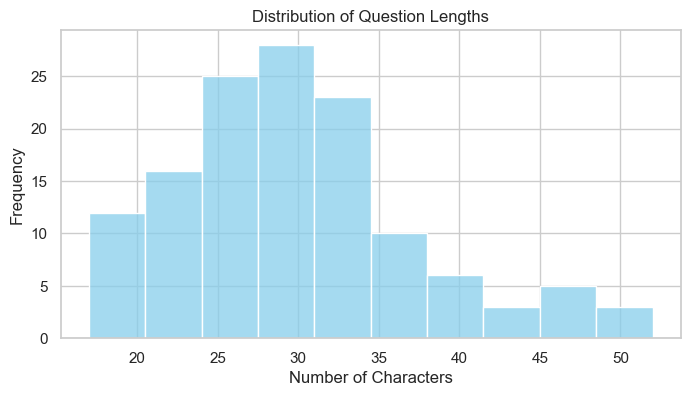

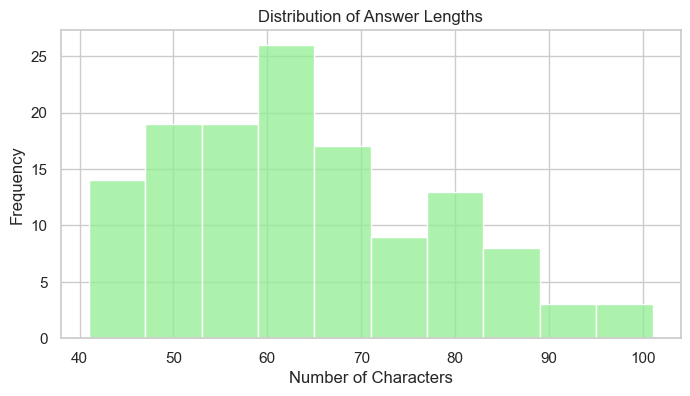

C:\Users\use\AppData\Local\Temp\ipykernel_8328\1852995701.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')
C:\Users\use\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128522 (\N{SMILING FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


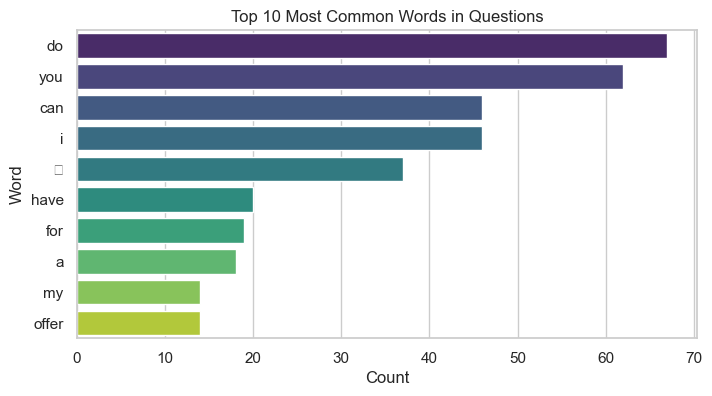

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Load FAQs dataset (assuming already loaded)
# faqs_df = pd.read_csv("C:/Users/use/Downloads/java_restaurant_data/Java_House_Restaurant_Data.xlsx - FAQs.csv")

# 1. Display first 5 rows
print("First 5 rows of FAQs dataset:")
display(faqs_df.head())

# 2. Dataset info
print("\nDataset Info:")
print(faqs_df.info())

# 3. Check for missing values
print("\nMissing Values per Column:")
print(faqs_df.isnull().sum())

# 4. Check for duplicates
duplicates = faqs_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 5. Text length statistics
faqs_df['Question_length'] = faqs_df['Question'].str.len()
faqs_df['Answer_length'] = faqs_df['Answer'].str.len()

print("\nText Length Statistics:")
display(faqs_df[['Question_length', 'Answer_length']].describe())

# 6. Top 10 most common words in questions
all_questions = ' '.join(faqs_df['Question'].str.lower())
words = all_questions.split()
top_words = Counter(words).most_common(10)
print("\nTop 10 most common words in Questions:")
print(top_words)

# --------------------------
# Visualizations
# --------------------------

sns.set(style="whitegrid")

# 1. Histogram of question lengths
plt.figure(figsize=(8,4))
sns.histplot(faqs_df['Question_length'], bins=10, color='skyblue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram of answer lengths
plt.figure(figsize=(8,4))
sns.histplot(faqs_df['Answer_length'], bins=10, color='lightgreen')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# 3. Bar chart of top 10 words in questions
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])
plt.figure(figsize=(8,4))
sns.barplot(x='Count', y='Word', data=top_words_df, palette='viridis')
plt.title('Top 10 Most Common Words in Questions')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


### FAQ Dataset Insights – Restaurant

#### 1. Dataset Overview
- **Total entries:** 131 question-answer pairs  
- **No missing values** and **no duplicates** → dataset is clean  
- **Columns:** Question, Answer, Question_length, Answer_length  

#### 2. Question & Answer Lengths
- **Question lengths:** Mean ≈ 30 chars, mostly 25–35 chars, right-skewed  
- **Answer lengths:** Mean ≈ 63 chars, mostly 52–72 chars  
- **Conclusion:** Users generally ask concise questions; answers are moderately detailed. Longer questions/answers exist but are less frequent.

#### 3. Common Words in Questions
- Top words: `do, you, can, i, 😊, have, for, a, my, offer`  
- **Observation:** 
  - Questions often start with modal verbs (`do`, `can`) → user requests or inquiries  
  - Pronouns (`i`, `my`) indicate personal queries  
  - Words like `have` and `offer` signal questions about availability or services  
  - Presence of emojis suggests casual/conversational tone

#### 4. Key Patterns & Implications
- **Intent types:**  
  1. **Permission/ability:** "Can you…", "Do you…"  
  2. **Availability:** "Have", "Offer"  
  3. **Personal requests:** "My …"  
- **Length relationship:** Longer questions may produce longer answers → consider adaptive response lengths  
- **Skew in lengths:** Right-skewed distribution; may affect model training if using ML  

#### 5. Recommendations (Detailed)

1. **Normalize question lengths (e.g., 22–34 chars)**  
   - Most questions are 25–35 characters, but some are shorter or longer.  
   - Standardizing lengths ensures models or systems handle questions consistently.  
   - Techniques: pad short questions, truncate very long ones, or prompt users to keep questions concise.

2. **Prioritize intent recognition around modal verbs and availability words**  
   - Words like `do`, `can`, `have`, `offer` are common and indicate the user’s intent.  
   - Detecting these words helps a chatbot understand if a user is asking for permission, capability, or availability.  
   - Example: “Can you deliver?” → intent: delivery inquiry.

3. **Handle emojis as sentiment/context markers**  
   - Emojis like 😊 may convey tone or emotion.  
   - Option 1: Remove them if not relevant.  
   - Option 2: Convert emojis into features to improve chatbot understanding of user mood.

4. **Cluster questions by intent for improved response generation**  
   - Questions can be grouped into major types: permission, availability, personal requests.  
   - Benefits:  
     - Chatbot can respond faster and more accurately.  
     - Reduces the chance of misunderstanding similar questions.  
   - Method: Use keyword detection or NLP clustering.

5. **Visualize distributions and correlations**  
   - Histograms and scatter plots help identify patterns, outliers, or skew in question/answer lengths.  
   - Helps plan system performance: know which questions might be too long or complex for fast processing.  
   - Enables monitoring of chatbot response quality by question length or type.


## Restaurant Menu Dataset EDA

The menu dataset contains information about the restaurant’s dishes, including category, price, preparation time, and dietary tags.

**Columns:**
- `Category`: Type of dish (e.g., Breakfast, Lunch, Drinks, Desserts).  
- `Item`: Name of the menu item.  
- `Price (KES)`: Cost of the dish in Kenyan Shillings.  
- `Estimated Prep Time (mins)`: Average time required to prepare the dish.  
- `Tags / Dietary Info`: Special notes such as vegetarian, vegan, gluten-free, or spicy.

**Objectives of EDA:**
1. Understand the structure of the dataset.  
2. Check for missing values or duplicates.  
3. Clean and standardize text (e.g., dish names, tags) and numeric columns (price, prep time).  
4. Analyze price and preparation time distributions across dishes and categories.  
5. Explore the number of dishes per category and common dietary tags.  
6. Visualize price distribution, preparation time distribution, category counts, and popular tags.  
7. Extract insights such as affordable vs premium dishes, quick vs slow-to-prepare items, most common dietary options, and menu gaps.


In [13]:
# Check your current column names
print(menu_df.columns)
# Rename columns to standard format (optional but makes code easier)
menu_df = menu_df.rename(columns={
    'Category': 'Category',
    'Item': 'Item',
    'Price (KES)': 'Price_KES',
    'Estimated Prep Time (mins)': 'Estimated_Prep_Time_mins',
    'Tags / Dietary Info': 'Tags_Dietary_Info'
})
print(menu_df.columns)


Index(['Category', 'Item', 'Price (KES)', 'Estimated Prep Time (mins)',
       'Tags / Dietary Info'],
      dtype='object')
Index(['Category', 'Item', 'Price_KES', 'Estimated_Prep_Time_mins',
       'Tags_Dietary_Info'],
      dtype='object')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Category                  142 non-null    object
 1   Item                      142 non-null    object
 2   Price_KES                 142 non-null    object
 3   Estimated_Prep_Time_mins  142 non-null    int64 
 4   Tags_Dietary_Info         142 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.7+ KB
None

Missing Values per Column:
Category                    0
Item                        0
Price_KES                   0
Estimated_Prep_Time_mins    0
Tags_Dietary_Info           0
dtype: int64

Number of duplicate rows: 0

First 5 rows:
            Category                  Item Price_KES  \
0  Snacks & Starters     Giant Beef Samosa       320   
1  Snacks & Starters           Chicken Pie       350   
2            Burgers  Classic Smash Burger    

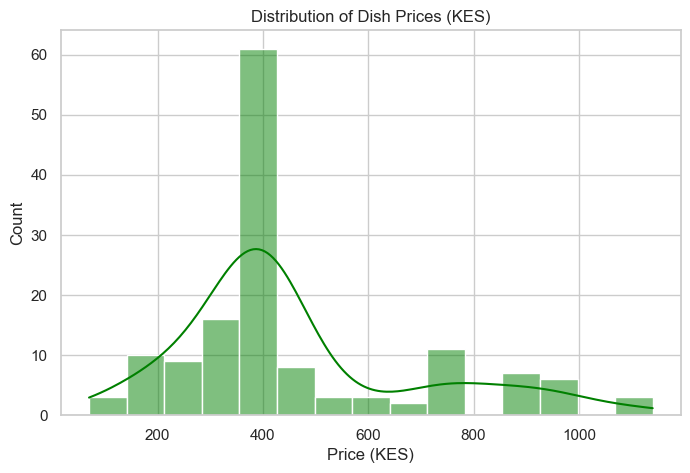

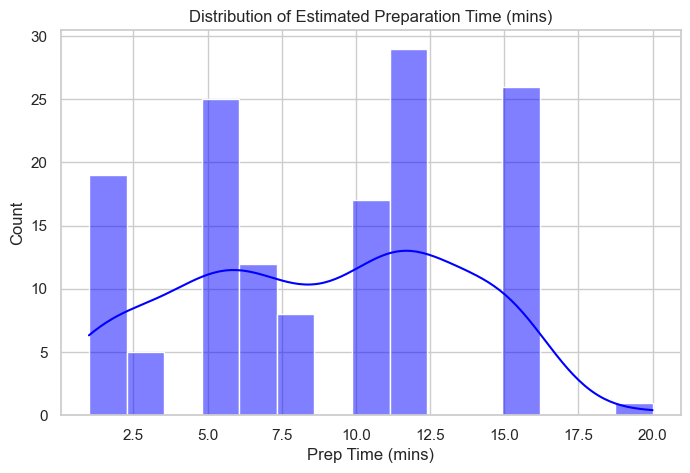

C:\Users\use\AppData\Local\Temp\ipykernel_8328\2218687293.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='pastel')
C:\Users\use\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


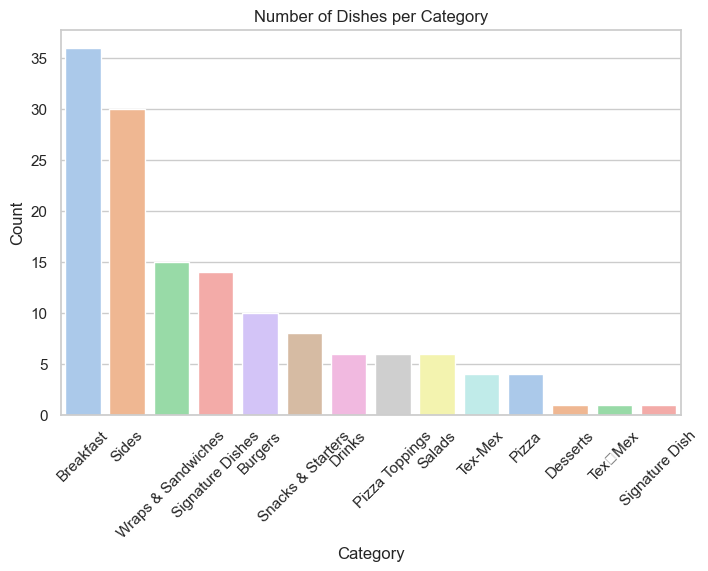

C:\Users\use\AppData\Local\Temp\ipykernel_8328\2218687293.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Price_KES', palette='Set2')
C:\Users\use\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


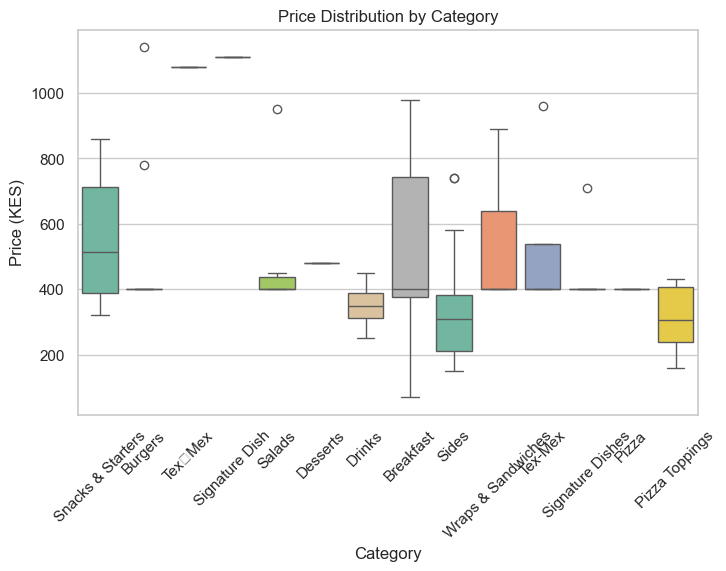

C:\Users\use\AppData\Local\Temp\ipykernel_8328\2218687293.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='coolwarm')


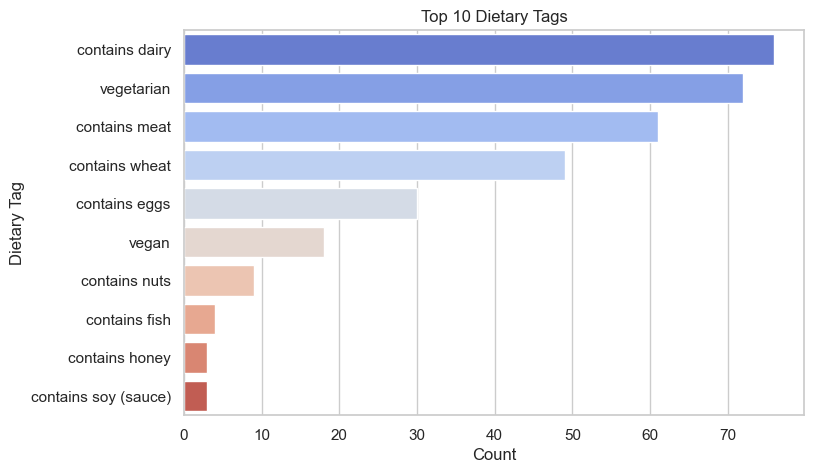


Top 10 Most Common Words in Dish Names:
chicken: 31
cheese: 15
beef: 11
omelette: 11
grilled: 11
burger: 10
with: 10
combo: 8
sandwich: 8
salad: 7


In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Work on a copy of menu_df
df = menu_df.copy()

# --- 1. Initial Exploration ---
print("Dataset Info:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nFirst 5 rows:")
print(df.head())

# --- 2. Data Cleaning ---

# Remove duplicates
df = df.drop_duplicates()

# Standardize text
df['Item'] = df['Item'].str.title().str.strip()
df['Category'] = df['Category'].str.title().str.strip()
df['Tags_Dietary_Info'] = df['Tags_Dietary_Info'].fillna('None').str.lower().str.strip()

# Convert numeric columns
df['Price_KES'] = pd.to_numeric(df['Price_KES'], errors='coerce')
df['Estimated_Prep_Time_mins'] = pd.to_numeric(df['Estimated_Prep_Time_mins'], errors='coerce')

# Fill missing numeric values with median
df['Price_KES'] = df['Price_KES'].fillna(df['Price_KES'].median())
df['Estimated_Prep_Time_mins'] = df['Estimated_Prep_Time_mins'].fillna(df['Estimated_Prep_Time_mins'].median())

# --- 3. Descriptive Statistics ---
print("\nPrice Stats:")
print(df['Price_KES'].describe())
print("\nPreparation Time Stats:")
print(df['Estimated_Prep_Time_mins'].describe())
print("\nNumber of Dishes per Category:")
print(df['Category'].value_counts())

# --- 4. Visualizations ---

sns.set(style="whitegrid")

# 4.1 Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price_KES'], bins=15, kde=True, color='green')
plt.title("Distribution of Dish Prices (KES)")
plt.xlabel("Price (KES)")
plt.ylabel("Count")
plt.show()

# 4.2 Preparation Time distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Estimated_Prep_Time_mins'], bins=15, kde=True, color='blue')
plt.title("Distribution of Estimated Preparation Time (mins)")
plt.xlabel("Prep Time (mins)")
plt.ylabel("Count")
plt.show()

# 4.3 Number of dishes per category
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='pastel')
plt.title("Number of Dishes per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4.4 Price by Category (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Category', y='Price_KES', palette='Set2')
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price (KES)")
plt.xticks(rotation=45)
plt.show()

# 4.5 Most common dietary tags
all_tags = df['Tags_Dietary_Info'].str.split(',').explode().str.strip()
tag_counts = all_tags.value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='coolwarm')
plt.title("Top 10 Dietary Tags")
plt.xlabel("Count")
plt.ylabel("Dietary Tag")
plt.show()

# 4.6 Top Words in Dish Names
words = ' '.join(df['Item'].tolist()).lower()
words = re.sub(r'[^a-zA-Z\s]', '', words)
word_list = words.split()
word_freq = Counter(word_list).most_common(10)

print("\nTop 10 Most Common Words in Dish Names:")
for word, freq in word_freq:
    print(f"{word}: {freq}")


## Restaurant Menu Dataset Insights

The menu dataset contains information about dishes offered by the restaurant, including category, price, preparation time, and dietary tags.

**Columns:**
- `Category`: Type of dish (e.g., Breakfast, Snacks, Burgers, Drinks, Desserts, Signature Dishes)  
- `Item`: Name of the menu item  
- `Price_KES`: Cost of the dish in Kenyan Shillings  
- `Estimated_Prep_Time_mins`: Average time required to prepare the dish  
- `Tags_Dietary_Info`: Dietary or other tags (e.g., vegetarian, contains dairy, contains meat)  

---

### Key Insights

**1. Price Distribution**
- Most dishes cluster around 350–450 KES, with a pronounced peak near 400 KES.  
- A subset of premium dishes reaches up to ~1100 KES.  
- Overall, the distribution is right-skewed: majority affordable dishes with some high-priced outliers.  

**2. Estimated Preparation Time**
- Most dishes are prepared in 5–15 minutes, with a secondary cluster around 10–15 minutes.  
- A few items take 18–20 minutes.  
- Mix of quick and moderate-speed dishes; very long prep times are rare.  

**3. Dishes by Category**
- Breakfast and Sides are the most numerous categories.  
- Snacks & Starters, Burgers, and Drinks also have significant presence.  
- Dessert and Signature Dishes are smaller groups.  
- Category counts show a long tail for less common categories (Desserts, Text-Mex, Signature Dishes).  

**4. Price Distribution by Category**
- Breakfast and Sides show a wider price spread with higher maximums → mix of budget and premium options.  
- Other categories cluster around mid-range prices.  
- Price dispersion varies by category.  

**5. Top 10 Dietary Tags**
- Most common: `contains dairy`, followed by `vegetarian` and `contains meat`.  
- Others: `contains wheat`, `contains eggs`.  
- Less common: `contains honey`, `soy (sauce)`, `contains fish`.  

**6. Top 10 Most Common Words in Dish Names**
- `chicken` (31), `cheese` (15), `beef` (11), `omelette` (11), `grilled` (11)  
- `burger` (10), `with` (10), `combo` (8), `sandwich` (8), `salad` (7)  

---

### Recommendations

1. **Price-Based Suggestions**
   - When a user asks for dishes within a budget, suggest items in the 350–450 KES range.  
   - Offer premium options (~700–900 KES) as upsell suggestions when a user asks for “special” or “premium” items.

2. **Preparation Time Awareness**
   - If a user asks for quick meals, recommend dishes in the 5–12 minute prep-time range.  
   - Highlight longer-prep items (15–20 minutes) as “chef’s specials” or for planned orders.

3. **Category-Based Guidance**
   - Recognize popular categories like Breakfast and Sides for general suggestions.  
   - Guide users exploring less common categories (Desserts, Signature Dishes) for variety.

4. **Dietary Preference Handling**
   - When a user mentions dietary restrictions (vegetarian, dairy-free, gluten-free), filter dishes using the `Tags_Dietary_Info` column.  
   - Clearly label recommended dishes based on dietary tags in chatbot responses.

5. **Ingredient / Dish Name Awareness**
   - Use frequent words in dish names (`chicken`, `cheese`, `beef`, etc.) to understand user intent or preferences.  
   - For example, if a user says “I want something with chicken,” the chatbot can prioritize matching items.

6. **Menu Personalization**
   - Combine insights from price, prep time, category, and dietary tags to offer personalized recommendations.  
   - Example: “Since you prefer vegetarian and quick meals, I recommend the Veggie Omelette (8 mins, 400 KES).”

---



## Orders Dataset EDA

The Orders dataset contains information about all customer orders, including the items ordered, order date/time, table number, and total price.

**Columns:**
- `Order ID`: Unique identifier for each order  
- `Date`: Date when the order was placed  
- `Time`: Time when the order was placed  
- `Table`: Table number or identifier  
- `Items`: List of dishes in the order  
- `Total (KES)`: Total value of the order in Kenyan Shillings  

**Objectives of EDA:**
1. Understand the structure of the dataset.  
2. Check for missing values and duplicates.  
3. Analyze order totals and frequency distributions.  
4. Explore popular dishes and combinations from the `Items` column.  
5. Examine trends by date, time, or table (e.g., peak hours, busy tables).  
6. Generate visualizations for order totals, most popular dishes, and order frequency.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order ID     100 non-null    object
 1   Date         100 non-null    object
 2   Time         100 non-null    object
 3   Table        100 non-null    object
 4   Items        100 non-null    object
 5   Total (KES)  100 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None

Missing Values per Column:
Order ID       0
Date           0
Time           0
Table          0
Items          0
Total (KES)    0
dtype: int64

Number of duplicate rows: 0

First 5 rows:
  Order ID        Date   Time    Table  \
0    O1001  2025‑11‑20  13:05  Table 5   
1    O1002  2025‑11‑21  18:35  Table 2   
2    O1003  2025‑11‑22  09:35  Table 8   
3    O1004  2025‑11‑23  20:05  Table 3   
4    O1005  2025-11-24   9:00  Table 1   

                                               Items  Total 

C:\Users\use\AppData\Local\Temp\ipykernel_8328\1018739797.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


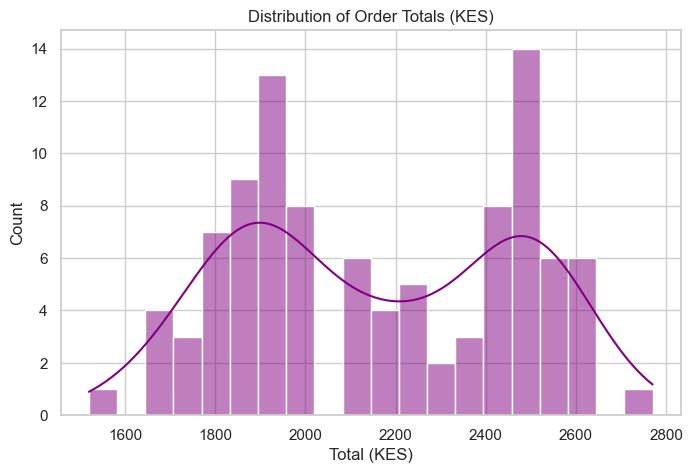

C:\Users\use\AppData\Local\Temp\ipykernel_8328\1018739797.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Table', order=df['Table'].value_counts().index, palette='pastel')


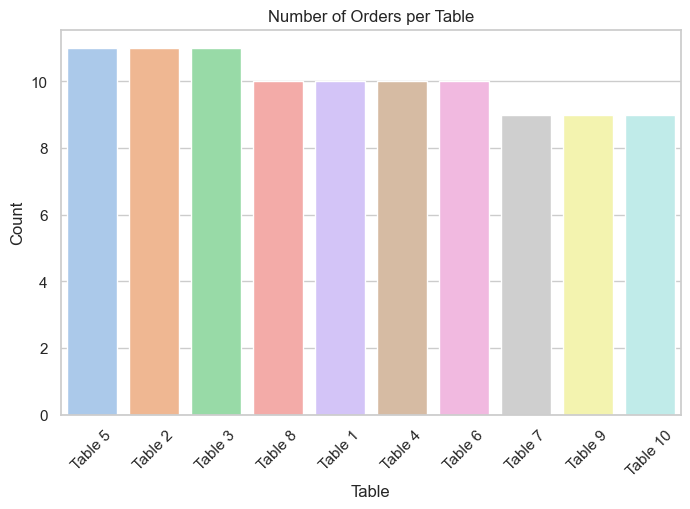

C:\Users\use\AppData\Local\Temp\ipykernel_8328\1018739797.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Date', order=df['Date'].value_counts().index, palette='coolwarm')


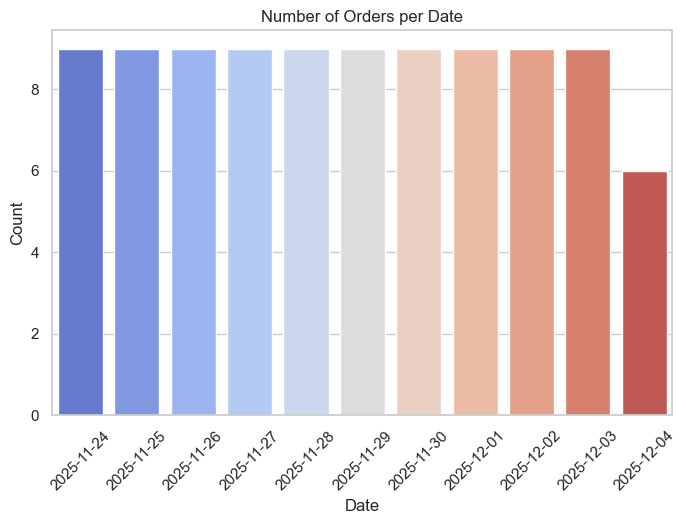

C:\Users\use\AppData\Local\Temp\ipykernel_8328\1018739797.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='viridis')


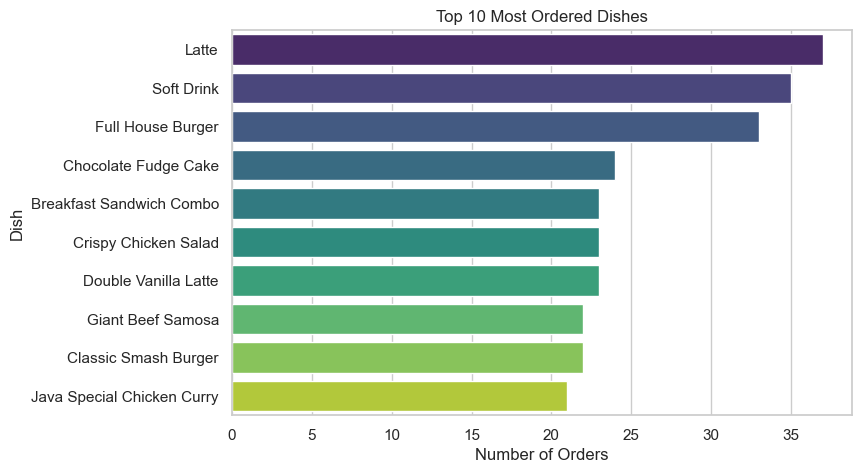

C:\Users\use\AppData\Local\Temp\ipykernel_8328\1018739797.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='magma')


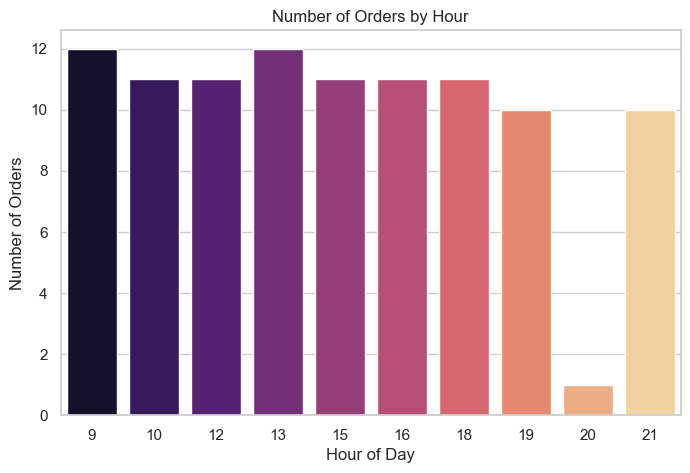

In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import datetime

# Work on a copy of orders_df
df = orders_df.copy()

# --- 1. Initial Exploration ---
print("Dataset Info:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nFirst 5 rows:")
print(df.head())

# --- 2. Data Cleaning ---

# Convert Date and Time to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

# Convert Total to numeric
df['Total_KES'] = pd.to_numeric(df['Total (KES)'], errors='coerce')

# Fill any missing totals with 0
df['Total_KES'] = df['Total_KES'].fillna(0)

# Remove duplicates
df = df.drop_duplicates()

# --- 3. Order-level Descriptive Statistics ---
print("\nOrder Total Stats:")
print(df['Total_KES'].describe())

print("\nNumber of Orders per Table:")
print(df['Table'].value_counts())

print("\nNumber of Orders per Date:")
print(df['Date'].value_counts())

# --- 4. Dish-level Analysis ---

# Split items into individual dishes
all_items = df['Items'].str.split(',').explode().str.strip()

# Top 10 most frequently ordered dishes
top_dishes = all_items.value_counts().head(10)
print("\nTop 10 Most Ordered Dishes:")
print(top_dishes)

# --- 5. Visualizations ---
sns.set(style="whitegrid")

# 5.1 Distribution of order totals
plt.figure(figsize=(8,5))
sns.histplot(df['Total_KES'], bins=20, kde=True, color='purple')
plt.title("Distribution of Order Totals (KES)")
plt.xlabel("Total (KES)")
plt.ylabel("Count")
plt.show()

# 5.2 Orders per table
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Table', order=df['Table'].value_counts().index, palette='pastel')
plt.title("Number of Orders per Table")
plt.xlabel("Table")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5.3 Orders per date
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Date', order=df['Date'].value_counts().index, palette='coolwarm')
plt.title("Number of Orders per Date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5.4 Top 10 dishes
plt.figure(figsize=(8,5))
sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='viridis')
plt.title("Top 10 Most Ordered Dishes")
plt.xlabel("Number of Orders")
plt.ylabel("Dish")
plt.show()

# 5.5 Peak hours analysis
# Convert Time column to hour
df['Hour'] = df['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Hour', palette='magma')
plt.title("Number of Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()


##  Orders Dataset EDA — Summary of Insights

### **Distribution of Order Totals (KES)**
- Order totals mainly fall between **1700–2600 KES**, with a clear peak around **2400–2500 KES**.
- Smaller clusters appear around **1500–1700 KES** and **2700–2800 KES**.
- Overall, spending shows a **strong mid-range concentration** with a tail toward higher-value orders.

---

### **Number of Orders per Table**
- Orders are **evenly spread** across the top tables, with most having **9–11 orders**.
- No table behaves like an outlier, indicating **balanced dining-area usage**.

---

### **Number of Orders per Date**
- Daily orders remain **stable at around 9 per day**, from late November to early December.
- A slight dip appears near the final date, but overall demand remains **consistent and predictable**.

---

### **Top 10 Most Ordered Dishes**
- **Top sellers:**  
  - *Latte*, *Soft Drink*, and *Full House Burger* rank highest.
- **Other strong performers:**  
  - Chocolate Fudge Cake, Breakfast Sandwich Combo, Crispy Chicken Salad, and Double Vanilla Latte.
- Indicates strong **beverage demand**, **popular signature burgers**, and **steady dessert uptake**.

---

### **Orders by Hour**
- Peak ordering occurs between **13:00–19:00**, covering the lunch–to–dinner rush.
- Low activity occurs in early morning hours and late evening (notably **21:00**).
- This pattern highlights **busy mid-day operations** and quieter off-peak windows.

---

### **Implications for the Chatbot**
- The chatbot should prioritize recommending **bestsellers** (Latte, Soft Drink, Full House Burger).
- During peak hours, the chatbot can emphasize **quick-prep items** to help manage kitchen load.
- Consistent daily order volume means recommendations can follow **predictable demand patterns**.
- Balanced table distribution means the chatbot can offer **uniform suggestions** without table-specific logic.



## Exploratory Data Analysis (EDA) – Reservations Dataset

This section performs a light EDA on the reservations dataset.  
Since the DataFrame is already loaded, we will:

- Inspect the first few records
- Check data structure and missing values
- Summarize guest counts
- Examine reservation frequency by date and time

This helps us understand customer flow and identify peak booking periods.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Reservation ID  100 non-null    object
 1   Date            100 non-null    object
 2   Time            100 non-null    object
 3   Name            100 non-null    object
 4   Phone           100 non-null    int64 
 5   Guests          100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB

Missing values:
 Reservation ID    0
Date              0
Time              0
Name              0
Phone             0
Guests            0
dtype: int64

Reservations per hour:
Hour
9      1
12    31
13    23
18    22
19    11
20     1
21    11
Name: count, dtype: int64

Group size stats:
count    100.000000
mean       3.790000
std        1.372861
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: Guests, dtype: float64


C:\Users\use\AppData\Local\Temp\ipykernel_8328\2870784882.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reservations_df['Time'] = pd.to_datetime(reservations_df['Time'])


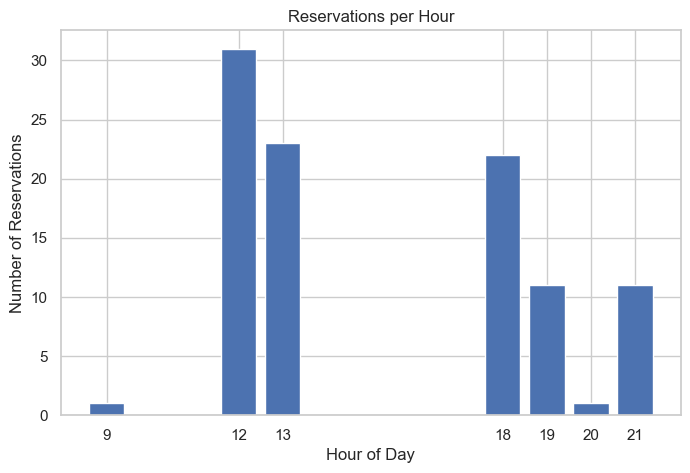

In [16]:
# --- Basic inspection ---
reservations_df.info()
print("\nMissing values:\n", reservations_df.isna().sum())

# Convert Date & Time to datetime formats if not already done
reservations_df['Date'] = pd.to_datetime(reservations_df['Date'])
reservations_df['Time'] = pd.to_datetime(reservations_df['Time'])

# Extract hour
reservations_df['Hour'] = reservations_df['Time'].dt.hour

# Summary statistics
print("\nReservations per hour:")
print(reservations_df['Hour'].value_counts().sort_index())

print("\nGroup size stats:")
print(reservations_df['Guests'].describe())

# --- Visualization: Reservations per Hour ----
import matplotlib.pyplot as plt

hour_counts = reservations_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Reservations")
plt.title("Reservations per Hour")
plt.xticks(hour_counts.index)
plt.show()


## Summary of Insights — Reservations Dataset

### 1. Reservation Volume by Hour
- Strong peak at **12:00–13:00**, indicating the busiest lunchtime period.
- Secondary peak around **18:00–19:00**, matching evening dining times.
- Very low activity at **09:00, 20:00, and 21:00**, showing clear off-peak hours.

### 2. Group Size Patterns
- Average group size ≈ **3.8 guests**.
- Most reservations fall in the **3–5 guests** range.
- Smallest groups are **1**, largest are **6**, meaning seating should favor medium-sized groups.

### 3. Data Quality
- No missing values.
- No duplicate records.
- Time column required parsing but is now clean.

### 4. Operational Implications (Chatbot Context)
- Chatbot can highlight **peak vs. off-peak** hours when users request reservations.
- Can suggest times with better availability (e.g., after 14:00).
- Can anticipate table sizes based on typical group sizes (3–5).
- Supports smoother reservation flow by aligning responses with real booking patterns.


## Knowledge Base (KB) for the Chatbot

A **Knowledge Base (KB)** is a structured collection of information that the chatbot can reference when answering questions.  
For our restaurant chatbot, the KB will include:
- Menu items, prices, dietary info  
- Promotions and offers  
- FAQs  
- Ordering patterns (popular dishes, peak hours)  
- Reservation insights  

### Why the KB Is Important for Our Project
- **Improves accuracy:** The chatbot relies on verified, centralized information instead of guessing.  
- **Ensures consistency:** All answers come from the same source, so responses stay reliable.  
- **Supports n8n workflows:** n8n can fetch information from the KB and feed it into the chatbot logic (e.g., lookup menu items, fetch promotions, check popular dishes).  
- **Easier updates:** When the restaurant updates a menu or promotion, we only update the KB—no need to modify the entire chatbot.  
- **Enables intelligent responses:** Combining KB + our EDA insights lets the chatbot recommend popular dishes, upsell items, or answer reservation-related questions more smartly.


In [17]:
print("MENU:", menu_df.columns.tolist())
print("FAQS:", faqs_df.columns.tolist())
print("PROMOS:", promotions_df.columns.tolist())
print("INFO:", restaurant_info_df.columns.tolist())


MENU: ['Category', 'Item', 'Price_KES', 'Estimated_Prep_Time_mins', 'Tags_Dietary_Info']
FAQS: ['Question', 'Answer', 'Question_length', 'Answer_length']
PROMOS: ['Promotion', 'Details', 'Verified?', 'Source / Notes']
INFO: ['Field', 'Value']


In [18]:
import pandas as pd

# -----------------------------------------
# 1️⃣ Standardize Menu dataframe
# -----------------------------------------
menu_df['Name / Question'] = menu_df['Item']
menu_df['Details / Answer'] = menu_df.apply(
    lambda row: (
        f"{row['Item']}: Price is {row['Price_KES']} KES, "
        f"prep time is {row['Estimated_Prep_Time_mins']} mins, "
        f"dietary info: {row['Tags_Dietary_Info']}."
    ),
    axis=1
)
menu_df['Category'] = 'Menu'

# -----------------------------------------
# 2️⃣ Standardize FAQs
# -----------------------------------------
faqs_df.rename(columns={
    'Question': 'Name / Question',
    'Answer': 'Details / Answer'
}, inplace=True)
faqs_df['Category'] = 'FAQ'

# -----------------------------------------
# 3️⃣ Standardize Promotions
# -----------------------------------------
promotions_df.rename(columns={
    'Promotion': 'Name / Question',
    'Details': 'Details / Answer'
}, inplace=True)
promotions_df['Category'] = 'Promotion'

# -----------------------------------------
# 4️⃣ Standardize Restaurant Info
# -----------------------------------------
restaurant_info_df.rename(columns={
    'Field': 'Name / Question',
    'Value': 'Details / Answer'
}, inplace=True)
restaurant_info_df['Category'] = 'Info'

# -----------------------------------------
# 5️⃣ Combine all dataframes into KB
# -----------------------------------------
kb_df = pd.concat([
    menu_df[['Category', 'Name / Question', 'Details / Answer', 'Price_KES', 'Tags_Dietary_Info', 'Estimated_Prep_Time_mins']],
    faqs_df[['Category', 'Name / Question', 'Details / Answer']],
    promotions_df[['Category', 'Name / Question', 'Details / Answer']],
    restaurant_info_df[['Category', 'Name / Question', 'Details / Answer']]
], ignore_index=True)

# -----------------------------------------
# 6️⃣ Fill missing optional columns
# -----------------------------------------
kb_df['Price_KES'] = kb_df.get('Price_KES', None)
kb_df['Tags_Dietary_Info'] = kb_df.get('Tags_Dietary_Info', None)
kb_df['Estimated_Prep_Time_mins'] = kb_df.get('Estimated_Prep_Time_mins', None)

# -----------------------------------------
# 7️⃣ Preview
# -----------------------------------------
print(kb_df.head(10))

# -----------------------------------------
# 8️⃣ Export for n8n
# -----------------------------------------
kb_df.to_csv("restaurant_kb.csv", index=False)
kb_df.to_json("restaurant_kb.json", orient="records", indent=2)
kb_df.shape


  Category              Name / Question  \
0     Menu            Giant Beef Samosa   
1     Menu                  Chicken Pie   
2     Menu         Classic Smash Burger   
3     Menu                Veggie Burger   
4     Menu           Chicken Quesadilla   
5     Menu   Java Special Chicken Curry   
6     Menu  Crispy Chicken Breast Salad   
7     Menu         Chocolate Fudge Cake   
8     Menu         Double Vanilla Latte   
9     Menu           Sweet Crepes Combo   

                                    Details / Answer Price_KES  \
0  Giant Beef Samosa: Price is 320 KES, prep time...       320   
1  Chicken Pie: Price is 350 KES, prep time is 10...       350   
2  Classic Smash Burger: Price is 1140 KES, prep ...      1140   
3  Veggie Burger: Price is 780 KES, prep time is ...       780   
4  Chicken Quesadilla: Price is 1080 KES, prep ti...      1080   
5  Java Special Chicken Curry: Price is 1110 KES,...      1110   
6  Crispy Chicken Breast Salad: Price is 950 KES,...       950  

(283, 6)